In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from partial_svd import *
import numpy as np
import matplotlib.pyplot as plt
import cv2



### Comparing Result with Numpy

We could do the same computation through the numpy svd function.  Compute a same matrix and see if the results from both packages are the same

In [2]:
row , col = 5, 8
a = np.arange(1, row*col + 1,dtype = np.float64).reshape(row,col)

In [3]:
u, s, v = compute_svd(a, 2, 0.0000001)
u2,s2, v2 = np.linalg.svd(a)

In [4]:
u, s, v

(array([[ 0.08904994, -0.76948327],
        [ 0.24073032, -0.49204534],
        [ 0.39241067, -0.21460472],
        [ 0.54409105,  0.0628306 ],
        [ 0.6957714 ,  0.34027055]]),
 array([148.6315155 ,   6.97643948]),
 array([[ 0.30605444,  0.31925523,  0.33245602,  0.34565681,  0.3588576 ,
          0.37205839,  0.38525918,  0.39845997],
        [ 0.56669617,  0.41288817,  0.25908017,  0.10527217, -0.04853582,
         -0.20234394, -0.35615182, -0.5099597 ]]))

In [5]:
u2, s2, v2

(array([[-0.08905037, -0.76946087,  0.54294303, -0.15878287, -0.28284425],
        [-0.24073058, -0.49198454, -0.66548962,  0.48813542, -0.13728577],
        [-0.39241079, -0.21450821,  0.08032656, -0.05006994,  0.88940466],
        [-0.544091  ,  0.06296812, -0.33595638, -0.72913491, -0.23557502],
        [-0.69577121,  0.34044445,  0.37817641,  0.4498523 , -0.23369962]]),
 array([1.48631522e+02, 6.97643742e+00, 6.29315474e-15, 2.75305002e-15,
        6.93110099e-16]),
 array([[-0.30605442, -0.31925521, -0.332456  , -0.3456568 , -0.35885759,
         -0.37205838, -0.38525918, -0.39845997],
        [ 0.56832857,  0.41459092,  0.26085328,  0.10711564, -0.046622  ,
         -0.20035965, -0.35409729, -0.50783493],
        [ 0.00222129, -0.22173153,  0.17605313,  0.03581244,  0.11581949,
          0.37723567, -0.81060505,  0.32519456],
        [-0.03815972,  0.11593867, -0.48505115, -0.15930901,  0.72414494,
          0.26186548, -0.06218794, -0.35724127],
        [-0.23084617, -0.44541739

In [6]:
U_c = np.zeros((row, row), dtype = np.float64)
S_c = np.zeros((row), dtype = np.float64)
V_c = np.zeros((col, col), dtype = np.float64)

In [7]:
num_eigen = s.shape[0]
U_c[:,:num_eigen] = u
S_c[:num_eigen] = s
V_c[:num_eigen, :] = v

In [8]:
S = np.array(U_c * S_c)

### Image Denosing Examples

In [9]:
img = cv2.imread('noisy.jpg',cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float64)

In [19]:
import time
start = time.time()
u,s,vt = compute_svd(img, 0, 0)
end = time.time()
print('svd with threshold takes: %s seconds'%str(end-start))

KeyboardInterrupt: 

In [ ]:
start2 = time.time()
u2,s2,vt2 = np.linalg.svd(img)
end2 = time.time()
print('numpy svd computation takes: %s seconds'%str(end2-start2))

In [18]:
s.shape, s2.shape

((296,), (300,))

In [82]:
u.shape, u2.shape

((300, 28), (300, 300))

In [83]:
vt.shape, vt2.shape

((28, 300), (300, 300))

In [84]:
compressed_img = np.dot(u*s, vt)

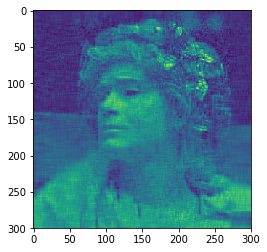

In [85]:
plt.imshow(compressed_img)
plt.show()

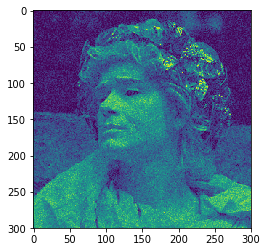

In [86]:
plt.imshow(img)
plt.show()